# **cuDisc plotting example notebook**

This notebook shows how to use the file in/out functions (stored in fileIO.py) for cuDisc.

To run the cpp files, move to the cuDisc directory and use the commands

    make *

then

    ./*

replacing * with the desired code, without the extension (e.g. 1Ddisc, not 1Ddisc.cpp). This command will work for any codes in the /codes folder. The two example codes will generate outputs in the codes directory.




Text(0.5, 0, 'Radius (AU)')

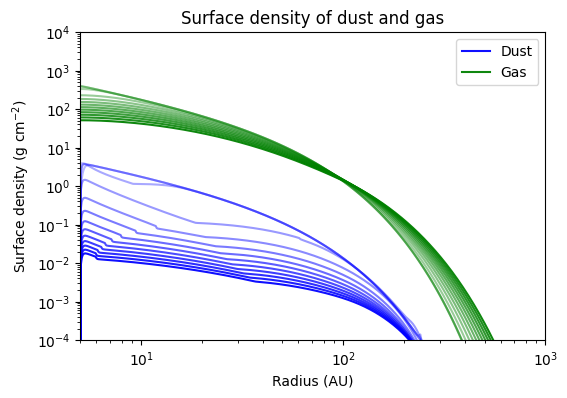

In [4]:
from fileIO import *
from constants import *
import numpy as np
import matplotlib.pyplot as plt
"""
Import and plot 1D run (1Ddisc.cpp)
"""

sim = CuDiscModel("../outputs/1Ddisc")

g = sim.grid
Sig_g, Sig_d, v_d, v_g = sim.load1Drun()

plt.figure(figsize=(6,4))

n = Sig_d.shape[0]-1

for i in range(0,n):
    plt.loglog(g.R_c/au, Sig_d[i,:], color = 'b', alpha = 0.1 + i*0.9/Sig_d.shape[0])
    plt.loglog(g.R_c/au, Sig_g[i,:], color = 'g', alpha = 0.1 + i*0.9/Sig_d.shape[0])

plt.loglog(g.R_c/au, Sig_d[Sig_d.shape[0]-1,:], color = 'b', alpha = 0.1 + n*0.9/Sig_d.shape[0], label="Dust")
plt.loglog(g.R_c/au, Sig_g[Sig_d.shape[0]-1,:], color = 'g', alpha = 0.1 + n*0.9/Sig_d.shape[0], label="Gas")

plt.title("Surface density of dust and gas")
plt.legend()
plt.xlim(5,1000)
plt.ylim(1e-4,10000)
plt.ylabel(r"Surface density (g cm$^{-2}$)")
plt.xlabel("Radius (AU)")

In [2]:
"""
Import and plot 1D run multi-grain run (1Ddisc_multgrain.cpp)
"""

sim = CuDiscModel("../outputs/1Ddisc_multgrain/")

g = sim.grid
gas, dust = sim.load_all_dens1D_data()
sizes = sim.load_grain_sizes()

AttributeError: Could not find the grid file (2Dgrid.dat) in the simulation directory

In [3]:
plt.figure(figsize=(6,4))
for i in range(0,dust.Sigma.shape[0]):
    if i == dust.Sigma.shape[0]-1:
        plt.loglog(g.R_c/au, dust.Sigma[i,:,20], color = 'r', alpha = 0.1 + i*0.9/dust.Sigma.shape[0], label='%1.1f micron'%(sizes.a_c[20]*1e4))
        plt.loglog(g.R_c/au, dust.Sigma[i,:,110], color = 'b', alpha = 0.1 + i*0.9/dust.Sigma.shape[0], label='%1.1f cm'%(sizes.a_c[110]))
        plt.loglog(g.R_c/au, dust.Sigma[i].sum(-1), color = 'black', alpha = 0.1 + i*0.9/dust.Sigma.shape[0], label='Dust total')
        plt.loglog(g.R_c/au, gas.Sigma[i], color = 'g', alpha = 0.1 + i*0.9/dust.Sigma.shape[0], label='Gas')
    else:
        plt.loglog(g.R_c/au, dust.Sigma[i,:,20], color = 'r', alpha = 0.1 + i*0.9/dust.Sigma.shape[0])
        plt.loglog(g.R_c/au, dust.Sigma[i,:,110], color = 'b', alpha = 0.1 + i*0.9/dust.Sigma.shape[0])
        plt.loglog(g.R_c/au, dust.Sigma[i].sum(-1), color = 'black', alpha = 0.1 + i*0.9/dust.Sigma.shape[0])
        plt.loglog(g.R_c/au, gas.Sigma[i], color = 'g', alpha = 0.1 + i*0.9/dust.Sigma.shape[0])

plt.xlim(1,1000)
plt.ylim(1e-6,10000)
plt.ylabel(r"Surface density (g cm$^{-2}$)")
plt.xlabel("Radius (AU)")
plt.legend()

NameError: name 'dust' is not defined

<Figure size 600x400 with 0 Axes>

In [ ]:
plt.figure(figsize=(6,4))
for i in range(0,dust.Sigma.shape[0]):
    if i == dust.Sigma.shape[0]-1:
        plt.semilogx(g.R_c/au, dust.vR[i,:,20], color = 'r', alpha = 0.1 + i*0.9/dust.Sigma.shape[0], label='%1.1f micron'%(sizes.a_c[20]*1e4))
        plt.semilogx(g.R_c/au, dust.vR[i,:,110], color = 'b', alpha = 0.1 + i*0.9/dust.Sigma.shape[0], label='%1.1f cm'%(sizes.a_c[110]))
        plt.semilogx(g.R_c/au, gas.vR[i], color = 'g', alpha = 0.1 + i*0.9/dust.Sigma.shape[0], label='Gas')
    else:
        plt.semilogx(g.R_c/au, dust.vR[i,:,20], color = 'r', alpha = 0.1 + i*0.9/dust.Sigma.shape[0])
        plt.semilogx(g.R_c/au, dust.vR[i,:,110], color = 'b', alpha = 0.1 + i*0.9/dust.Sigma.shape[0])
        plt.semilogx(g.R_c/au, gas.vR[i], color = 'g', alpha = 0.1 + i*0.9/dust.Sigma.shape[0])

plt.xlim(1,1000)
plt.ylim(-100,100)
plt.ylabel(r"Radial velocity (cm s$^{-1}$)")
plt.xlabel("Radius (AU)")
plt.legend()

In [ ]:
# Plot grain size distribution

R_a_grid, a_R_grid = np.meshgrid(g.R_c[2:-2], sizes.a_c, indexing='ij')

t_snaps = [-3,-2,-1]

fig, ax = plt.subplots(1, len(t_snaps), figsize = (5*len(t_snaps),4), sharex=True)

for i, ti in enumerate(t_snaps):
    con = ax[i].contourf(R_a_grid/au, a_R_grid, np.log10(dust.Sigma[ti,2:-2,:]+1e-100),np.linspace(-7,0,40), extend='both')
    ax[i].set_xlabel("Radius (AU)")
    ax[i].set_ylim(1e-5,10)
    ax[i].set_yscale('log')

ax[0].set_ylabel("Grain size (cm)")
plt.xscale('log')

plt.xlim(1,1000)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.14, 0.02, 0.7])
cbar = fig.colorbar(con, cax=cbar_ax)
cbar.set_ticks(np.arange(-7,2,2))
cbar.set_ticklabels(["$10^{%d}$"%(x) for x in np.arange(-7,2,2)])
cbar.set_label(r"Dust surface density (g cm$^{-2}$)")

plt.show()
    